Mean Squared Error: 0.0155
R² Score: 0.9056


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


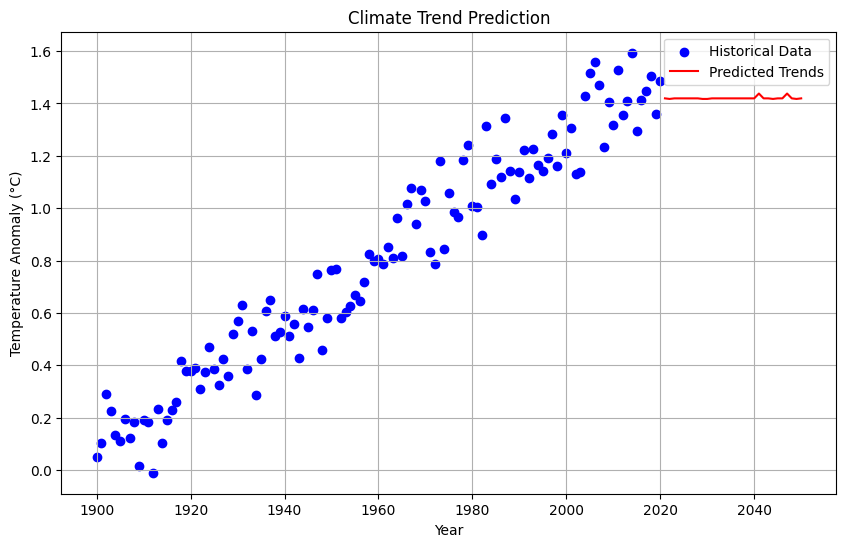

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load and Preprocess the Data
def load_data():

    # Dataset includes 'Year', 'CO2 Emissions', 'Global Temperature Anomaly'
    data = pd.DataFrame({
        "Year": np.arange(1900, 2021),
        "CO2_Emissions": np.random.uniform(2, 12, 121),  # Replace with real emissions data
        "Temperature_Anomaly": np.linspace(0.1, 1.5, 121) + np.random.normal(0, 0.1, 121)  # Replace with real data
    })
    return data

# Step 2: Prepare the Data for Modeling
def preprocess_data(data):
    X = data[['Year', 'CO2_Emissions']]
    y = data['Temperature_Anomaly']
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Model
def train_model(X_train, y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

# Step 4: Evaluate the Model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    return y_pred

# Step 5: Predict Future Trends
def predict_future(model, start_year, end_year):
    future_years = np.arange(start_year, end_year + 1).reshape(-1, 1)
    future_emissions = np.random.uniform(10, 15, len(future_years))  # Simulated future emissions
    future_data = np.hstack((future_years, future_emissions.reshape(-1, 1)))
    future_predictions = model.predict(future_data)
    return future_years.flatten(), future_predictions

# Step 6: Visualize Results
def visualize_predictions(data, future_years, future_predictions):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Year'], data['Temperature_Anomaly'], label='Historical Data', color='blue')
    plt.plot(future_years, future_predictions, label='Predicted Trends', color='red')
    plt.xlabel("Year")
    plt.ylabel("Temperature Anomaly (°C)")
    plt.title("Climate Trend Prediction")
    plt.legend()
    plt.grid()
    plt.show()

# Main Execution
if __name__ == "__main__":
    data = load_data()
    X_train, X_test, y_train, y_test = preprocess_data(data)
    model = train_model(X_train, y_train)
    evaluate_model(model, X_test, y_test)

    # Predict future trends from 2021 to 2050
    future_years, future_predictions = predict_future(model, 2021, 2050)
    visualize_predictions(data, future_years, future_predictions)
